In [6]:
import matplotlib.pyplot as plt
import os
import glob
from astar import *
from bfs import *
from ucs import *
from general import searchChar

def inputGrid(file_path):
    with open(file_path, 'r') as file: 
        line = file.readline().strip().split()
        row, col = list(map(int, line))
        
        grid = []
        for _ in range(row): 
            line = file.readline().strip().split()
            grid.append(list(line))
        
        start = searchChar("S", row, col, grid)
        goal = searchChar("G", row, col, grid)

        return row, col, grid, start, goal

In [52]:
rows = []
cols = []
grids = []
starts = []
goals = []
count = 0


dataset_path = os.path.join(os.getcwd(), '../dataset/*.txt') # 2. Ambil semua file yang cocok dengan pola tersebut
file_list = glob.glob(dataset_path) 

for file in file_list:
    row, col, grid, start, goal = inputGrid(file)
    rows.append(row)
    cols.append(col)
    grids.append(grid)
    starts.append(start)
    goals.append(goal)
    count += 1

In [53]:
bfs_explored = []
bfs_time = []
bfs_memory = []

for i in range(count):
    nExp_BFS, pathCost_BFS, path_BFS, time_BFS, memory_BFS = BFS(rows[i], cols[i], grids[i], starts[i], goals[i])
    bfs_explored.append(nExp_BFS)
    bfs_time.append(time_BFS)
    bfs_memory.append(memory_BFS)


In [54]:

UCS_explored = []
UCS_time = []
UCS_memory = []

for i in range(count):
    nExp_UCS, pathCost_UCS, path_UCS, time_UCS, memory_UCS = UCS(rows[i], cols[i], grids[i], starts[i], goals[i])
    UCS_explored.append(nExp_UCS)
    UCS_time.append(time_UCS)
    UCS_memory.append(memory_UCS)

In [55]:
Astar_explored = []
Astar_time = []
Astar_memory = []

for i in range(count):
    nExp_Astar, pathCost_Astar, path_Astar, time_Astar, memory_Astar = astar(rows[i], cols[i], grids[i], starts[i], goals[i])
    Astar_explored.append(nExp_Astar)
    Astar_time.append(time_Astar)
    Astar_memory.append(memory_Astar)

In [77]:
def visualize(data : list[list[int]], jenisSebaran: str, ylabel):
    fig = plt.figure(figsize =(10, 7))
    plotAxis = fig.add_subplot(111)

    boxplot = plotAxis.boxplot(data, patch_artist = True, notch =False, vert = 1)

    # changing color of boxes
    for patch in boxplot['boxes']:
        patch.set_facecolor('#7cc0d8')

    # changing style of medians
    for median in boxplot['medians']:
        median.set(color ='#134b5f', linewidth = 1.5)

    # # changing style of fliers

    # for flier in boxplot['fliers']:
    #     flier.set(marker ='D',
    #             color ='#0b2d39',
    #             alpha = 0.5)

    plotAxis.set_xticklabels(['BFS', 'UCS', 'A*'])
    
    plt.title(f"Sebaran {jenisSebaran} pada Setiap Algoritma")
    plt.ylabel(f"{ylabel}")  


    plt.show()

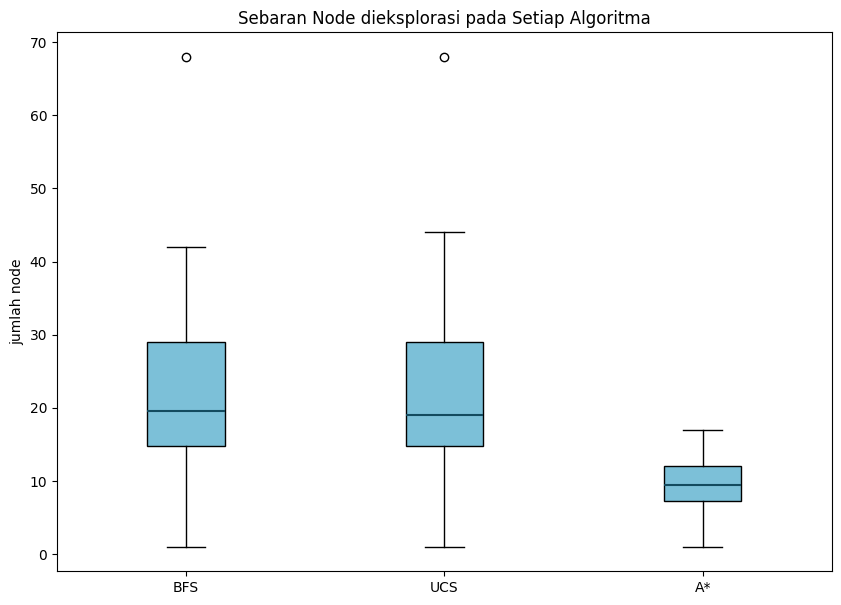

In [78]:
#explored
databfs = bfs_explored.copy()
dataUCS = UCS_explored.copy()
dataAstar = Astar_explored.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "Node dieksplorasi", "jumlah node")

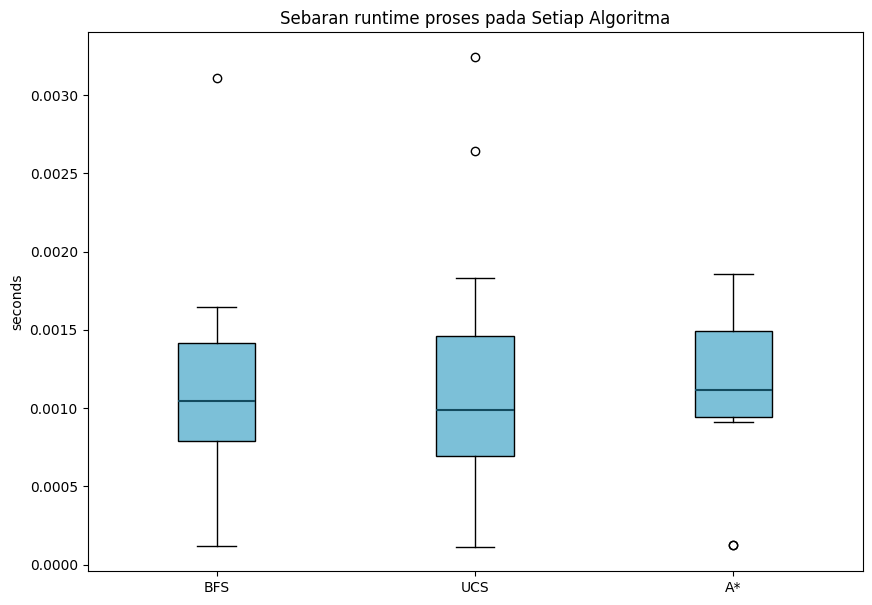

In [79]:
#runtime
databfs = bfs_time.copy()
dataUCS = UCS_time.copy()
dataAstar = Astar_time.copy()

databfs.pop(4)
databfs.pop(8)
dataUCS.pop(4)
dataUCS.pop(8)
dataAstar.pop(4)
dataAstar.pop(8)

data = [databfs, dataUCS, dataAstar]
visualize(data, "runtime proses", "seconds")